In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from matplotlib import pyplot as plt
from matplotlib import rc
from PIL import Image
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('Final_Data.csv')

In [4]:
data.rename(columns = {'2022.06' : '주민등록세대수', '외국인방문자(c)'  : '외국인방문자', '외지인방문자(b)' : '외지인방문자', '현지인방문자(a)' : '현지인방문자'}, inplace = True)

In [5]:
data['외지인/현지인'] = data['외지인방문자'] / data['현지인방문자']

In [6]:
data['외국인/현지인'] = data['외국인방문자'] / data['현지인방문자']

In [7]:
data['남성_중년층_방문자수'] = data[['30~39세_남성', '40~49세_남성']].sum(axis = 1)
data['여성_중년층_방문자수'] = data[['30~39세_여성', '40~49세_여성']].sum(axis = 1)

In [8]:
data['남성_노년층_방문자수'] = data[['70세 이상_남성', '60~69세_남성']].sum(axis = 1)
data['여성_노년층_방문자수'] = data[['70세 이상_여성', '60~69세_여성']].sum(axis = 1)

In [9]:
data['남성_장년층_방문자수'] = data['50~59세_남성']
data['여성_장년층_방문자수'] = data['50~59세_여성']

In [10]:
data['남성_청년층_방문자수'] = data['20~29세_남성']
data['여성_청년층_방문자수'] = data['20~29세_여성']

In [11]:
data['남성_청소년층_방문자수'] = data['10~19세_남성']
data['여성_청소년층_방문자수'] = data['10~19세_여성']

In [12]:
data['남성_유아동_방문자수'] = data['0~9세_남성']
data['여성_유아동_방문자수'] = data['0~9세_여성']

In [13]:
data.drop(['20~29세_남성', '10~19세_남성', '0~9세_남성', '20~29세_여성', '10~19세_여성', '0~9세_여성', '30~39세_남성', '40~49세_남성', '30~39세_여성', '40~49세_여성', '50~59세_남성', '50~59세_여성', '70세 이상_남성', '60~69세_남성', '70세 이상_여성', '60~69세_여성'], axis = 1, inplace = True)

In [14]:
data['남성_중년층_소비액'] = data[['40대_남성소비액', '30대_남성소비액']].sum(axis = 1)
data['여성_중년층_소비액'] = data[['40대_여성소비액', '30대_여성소비액']].sum(axis = 1)

In [15]:
data['남성_노년층_소비액'] = data[['80대_남성소비액', '70대_남성소비액']].sum(axis = 1)
data['여성_노년층_소비액'] = data[['80대_여성소비액', '70대_여성소비액']].sum(axis = 1)

In [16]:
data['남성_장년층_소비액'] = data['50대_남성소비액']
data['여성_장년층_소비액'] = data['50대_여성소비액']

In [17]:
data['남성_청년층_소비액'] = data['20대_남성소비액']
data['여성_청년층_소비액'] = data['20대_여성소비액']

In [18]:
data['남성_청소년층_소비액'] = data['10대_남성소비액']
data['여성_청소년층_소비액'] = data['10대_여성소비액']

In [19]:
data.drop(['80대_남성소비액', '70대_남성소비액',
       '60대_남성소비액', '50대_남성소비액', '40대_남성소비액', '30대_남성소비액', '20대_남성소비액',
       '10대_남성소비액', '80대_여성소비액', '70대_여성소비액', '60대_여성소비액', '50대_여성소비액',
       '40대_여성소비액', '30대_여성소비액', '20대_여성소비액', '10대_여성소비액'], axis = 1, inplace = True)

In [20]:
data.drop(['전체_검색건수', '현지인방문자', '외지인방문자', '외국인방문자', '기초지자체 지출액'], axis = 1, inplace = True)

In [21]:
mms = MinMaxScaler()

In [22]:
scaled = mms.fit_transform(data.iloc[:, 1:])

In [23]:
cls_n = range(5, 20)
inertia_list = []
sil_scores = []

In [24]:
for k in cls_n :
    model = KMeans(n_clusters = k, random_state = 42, max_iter = 500, n_init = 20).fit(scaled)
    inertia_list.append(model.inertia_)
    km_cls = model.fit_predict(scaled)
    score = silhouette_score(scaled, km_cls)
    sil_scores.append(score)

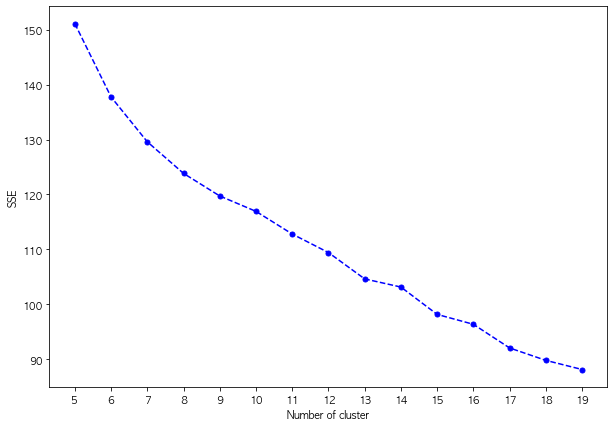

In [25]:
plt.figure(figsize = (10, 7))
plt.plot(cls_n, inertia_list, marker = 'o', color = 'blue', linestyle = '--', markersize = 5)
plt.xticks(ticks = cls_n)
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [26]:
result = pd.DataFrame({'n_components' : cls_n, 'inertia' : inertia_list, 'silhouette_score' : sil_scores})

In [27]:
result

,n_components,inertia,silhouette_score
0,5,151.126775,0.204283
1,6,137.761136,0.209773
2,7,129.598603,0.170129
3,8,123.841116,0.129457
4,9,119.725877,0.170201
5,10,116.923124,0.188271
6,11,112.796706,0.142983
7,12,109.418315,0.131522
8,13,104.620893,0.168514
9,14,103.136562,0.160131


In [28]:
scaled_data = pd.DataFrame(scaled, columns = data.columns[:-1])

In [29]:
model = KMeans(n_clusters = 6, random_state = 42, max_iter = 500, n_init = 20).fit(scaled)

In [30]:
km_cls = model.fit_predict(scaled)

In [31]:
scaled_data['km_cls'] = km_cls

In [32]:
scaled_data['기초지자체'] = data['기초지자체']

### 군집별 지자체 수

In [34]:
scaled_data['km_cls'].value_counts()

0    116
2    106
1     19
4      6
5      2
3      1
Name: km_cls, dtype: int64

### 문화관광지수 생성

In [35]:
scaled_data['문화관광지수'] = scaled_data.iloc[:, :-1].sum(axis = 1)

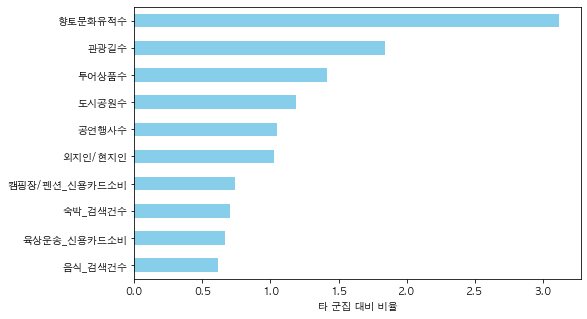

In [43]:
plt.figure(figsize = (8, 5))
(scaled_data[scaled_data['km_cls'] == 0].drop(['km_cls', '문화관광지수'], axis = 1).mean() / scaled_data[scaled_data['km_cls'] != 0].drop(['km_cls', '문화관광지수'], axis = 1).mean()).sort_values(ascending = False).head(10)[::-1].plot(kind = 'barh', color = 'skyblue')
plt.xlabel('타 군집 대비 비율')
plt.show()

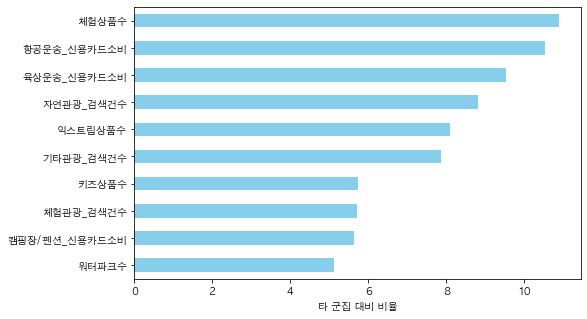

In [413]:
plt.figure(figsize = (8, 5))
(scaled_data[scaled_data['km_cls'] == 1].drop(['km_cls', '문화관광지수'], axis = 1).mean() / scaled_data[scaled_data['km_cls'] != 1].drop(['km_cls', '문화관광지수'], axis = 1).mean()).sort_values(ascending = False).head(10)[::-1].plot(kind = 'barh', color = 'skyblue')
plt.xlabel('타 군집 대비 비율')
plt.show()

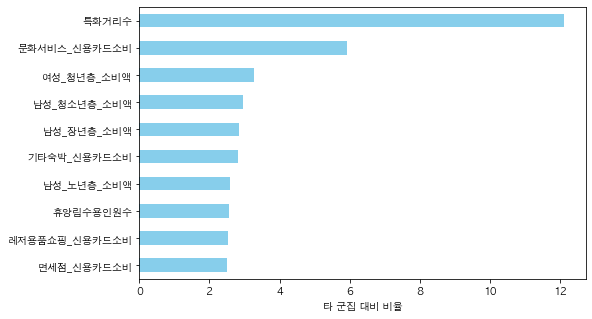

In [44]:
plt.figure(figsize = (8, 5))
(scaled_data[scaled_data['km_cls'] == 2].drop(['km_cls', '문화관광지수'], axis = 1).mean() / scaled_data[scaled_data['km_cls'] != 2].drop(['km_cls', '문화관광지수'], axis = 1).mean()).sort_values(ascending = False).head(10)[::-1].plot(kind = 'barh', color = 'skyblue')
plt.xlabel('타 군집 대비 비율')
plt.show()

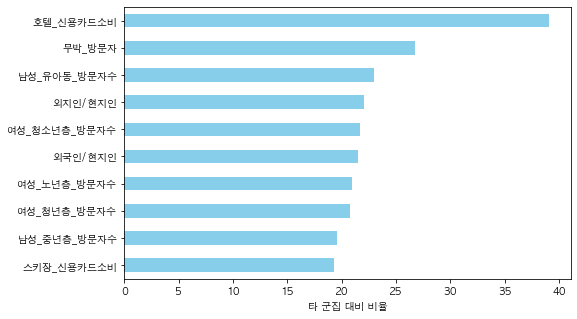

In [45]:
plt.figure(figsize = (8, 5))
(scaled_data[scaled_data['km_cls'] == 3].drop(['km_cls', '문화관광지수'], axis = 1).mean() / scaled_data[scaled_data['km_cls'] != 3].drop(['km_cls', '문화관광지수'], axis = 1).mean()).sort_values(ascending = False).head(10)[::-1].plot(kind = 'barh', color = 'skyblue')
plt.xlabel('타 군집 대비 비율')
plt.show()

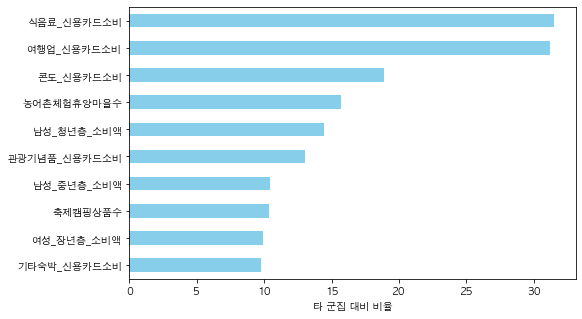

In [46]:
plt.figure(figsize = (8, 5))
(scaled_data[scaled_data['km_cls'] == 4].drop(['km_cls', '문화관광지수'], axis = 1).mean() / scaled_data[scaled_data['km_cls'] != 4].drop(['km_cls', '문화관광지수'], axis = 1).mean()).sort_values(ascending = False).head(10)[::-1].plot(kind = 'barh', color = 'skyblue')
plt.xlabel('타 군집 대비 비율')
plt.show()

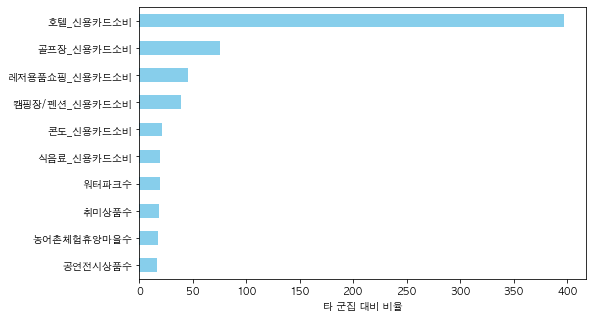

In [422]:
plt.figure(figsize = (8, 5))
(scaled_data[scaled_data['km_cls'] == 5].drop(['km_cls', '문화관광지수'], axis = 1).mean() / scaled_data[scaled_data['km_cls'] != 5].drop(['km_cls', '문화관광지수'], axis = 1).mean()).sort_values(ascending = False).head(10)[::-1].plot(kind = 'barh', color = 'skyblue')
plt.xlabel('타 군집 대비 비율')

plt.show()

In [294]:
top30 = scaled_data['문화관광지수'].sort_values(ascending = False).head(30).index

In [295]:
bottom30 = scaled_data['문화관광지수'].sort_values(ascending = False).tail(30).index

In [420]:
scaled_data.sort_values(by = '문화관광지수', ascending = False).head(10)[['기초지자체','문화관광지수']]

,기초지자체,문화관광지수
180,인천광역시 중구,31.641745
140,서울특별시 강남구,28.467289
219,제주특별자치도 제주시,26.998733
218,제주특별자치도 서귀포시,22.757842
157,서울특별시 송파구,19.183943
163,서울특별시 중구,18.849884
154,서울특별시 서초구,18.453385
152,서울특별시 마포구,17.122146
59,경기도 화성시,15.465259
162,서울특별시 종로구,15.002595


In [60]:
scaled_data.sort_values(by = '문화관광지수', ascending = False).tail(10)[['기초지자체','문화관광지수']]

,기초지자체,문화관광지수
198,전라남도 장흥군,1.189949
174,인천광역시 동구,1.172377
69,경상남도 의령군,1.164417
84,경상북도 고령군,1.136610
102,경상북도 청송군,1.029605
91,경상북도 성주군,1.017355
16,강원도 화천군,0.911559
94,경상북도 영양군,0.889897
5,강원도 양구군,0.859144
220,충청남도 계룡시,0.584729


## PCA + Bi-Plot

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components = 8, random_state = 42)

In [36]:
pca_result = pca.fit_transform(scaled_data.iloc[:, 1:-2])

In [39]:
pca_df = pd.DataFrame(pca_result, columns = [f'주성분{i }' for i in range(1, 9)], index = scaled_data['기초지자체'])

In [40]:
pca_df.head()

,주성분1,주성분2,주성분3,주성분4,주성분5,주성분6,주성분7,주성분8
기초지자체,,,,,,,,
강원도 강릉시,0.589884,0.957011,-0.146043,-0.186488,-0.376252,-0.145228,0.111677,0.175582
강원도 고성군,-0.209259,0.384290,0.257763,-0.134822,-0.082525,0.216338,0.250357,0.031574
강원도 동해시,-0.343333,0.002471,-0.011033,0.008374,-0.064511,-0.000635,-0.074895,0.003655
강원도 삼척시,-0.388991,0.410227,0.176812,-0.006996,0.036675,-0.205045,-0.048999,0.081034
강원도 속초시,0.208269,0.438295,0.111230,0.045184,-0.005134,0.207667,-0.126352,0.076789


In [41]:
loadings = pd.DataFrame(pca.components_.T, columns = [f'주성분{i }' for i in range(1, 9)], index = scaled_data.columns[1:-2])

In [42]:
ax = pd.DataFrame(pca_df.std()).T

In [43]:
pca_summary = pd.concat([ax,pd.DataFrame(pca.explained_variance_ratio_).set_index(ax.columns).T])

In [45]:
proportion = pca.explained_variance_ratio_
s = 0
result = []
for i in range(len(proportion)) :
    s = s+ proportion[i]
    result.append(np.round(s ,4))

In [46]:
pca_summary.loc[1] = result

In [47]:
pca_summary.index = ['표준편차', '변동량', '누적변동량']

In [48]:
pca_summary

,주성분1,주성분2,주성분3,주성분4,주성분5,주성분6,주성분7,주성분8
표준편차,0.594573,0.359341,0.245535,0.226925,0.209653,0.186588,0.172091,0.159463
변동량,0.345060,0.126037,0.058845,0.050263,0.042903,0.033982,0.028907,0.024820
누적변동량,0.345100,0.471100,0.529900,0.580200,0.623100,0.657100,0.686000,0.710800


In [306]:
def biplot(score, coeff, labels = None, index = None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 0.9 / (xs.max() - xs.min())
    scaley = 0.9 / (ys.max() - ys.min())
    plt.figure(figsize = (18, 15))
    plt.scatter(xs * scalex, ys * scaley, s = 5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color = 'orange', alpha = 0.5, head_width = 0.005)
        plt.text(coeff[i, 0]* 1.15, coeff[i, 1] * 1.05, labels[i], color = 'blue', ha = 'center', va = 'center', size = 10)
    for i in range(score.shape[0]):
        plt.text((xs * scalex)[i] , (ys * scaley)[i], size = 10, s = index[i])
    plt.title("PCA - Biplot",fontsize = 15)
    plt.xlabel("Comp.{}".format(1))
    plt.ylabel("Comp.{}".format(2))
    plt.grid()
    plt.savefig('biplot.png')

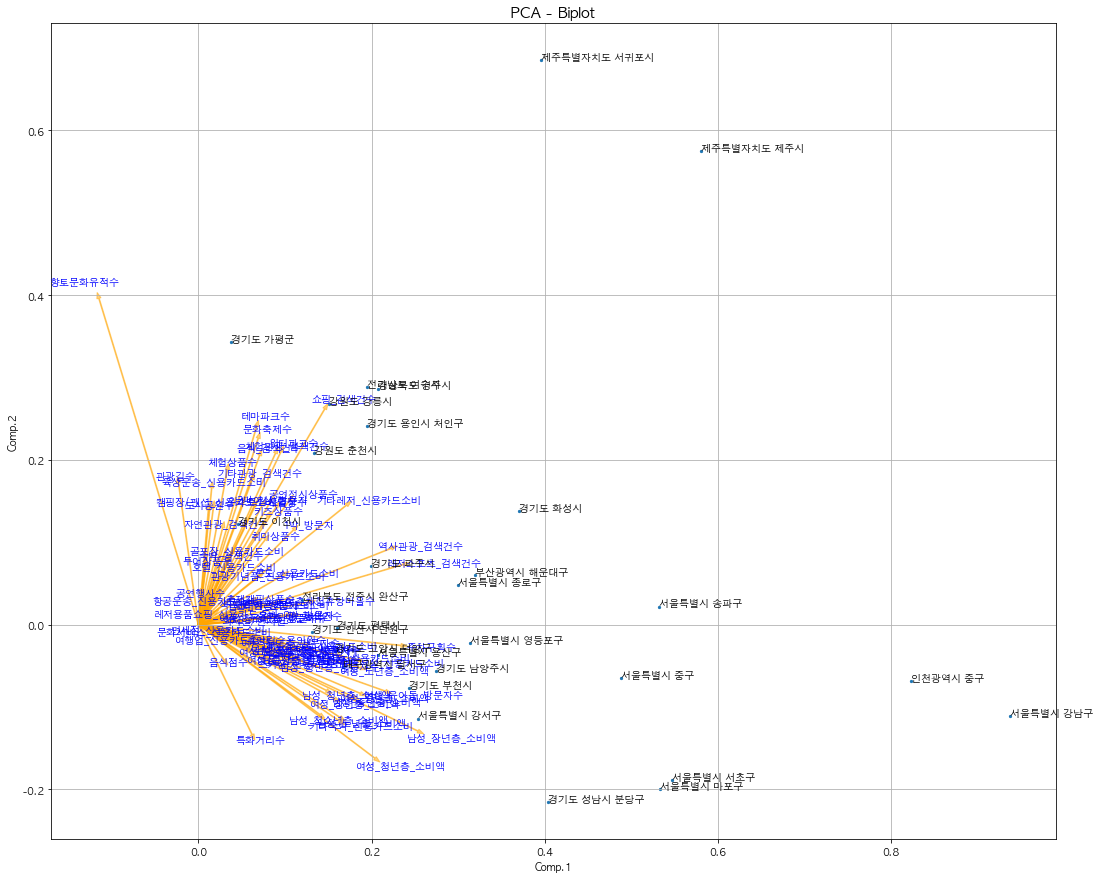

In [446]:
biplot(pca_result[top30], np.transpose(pca.components_), labels = scaled_data.columns[1:-2].tolist(), index = data['기초지자체'][top30].values)

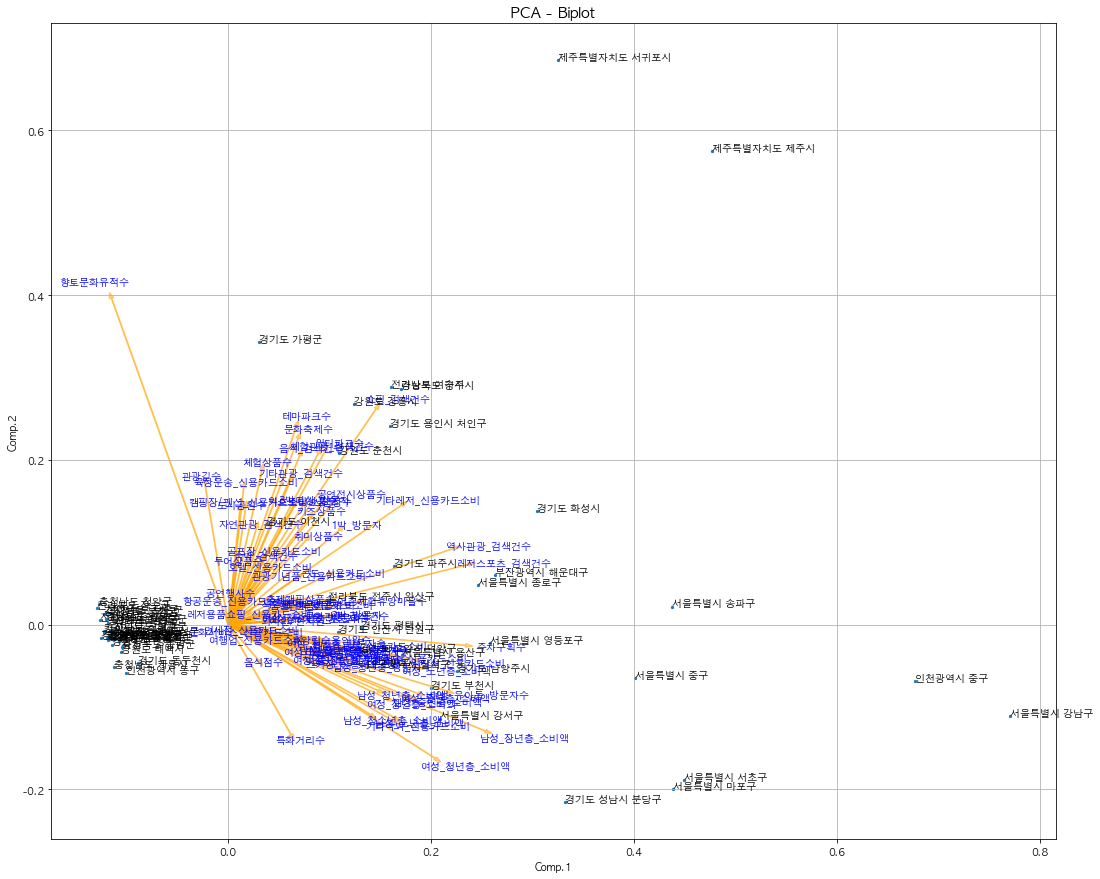

In [447]:
biplot(pca_result[bottom30.tolist() + top30.tolist()], np.transpose(pca.components_), labels = scaled_data.columns[1:-2].tolist(), index = data['기초지자체'][bottom30.tolist() + top30.tolist()].values)

### Features

In [448]:
def biplot(coeff, labels = None, index = None):

    n = coeff.shape[0]

    plt.figure(figsize = (22, 16))
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color = 'orange', alpha = 0.65, head_width = 0.005)
        if labels is None:
            plt.text(coeff[i, 0] *  1.15, coeff[i, 1] * 1.05, f"Var{i + 1}", color = 'blue', ha = 'center', va = 'center', alpha = 1, size = 15)
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.05, labels[i], color = 'blue', ha = 'center', va = 'center', alpha = 1, size = 12)
    plt.title("PCA - Biplot",fontsize = 15)
    plt.xlabel("Comp.{}".format(1))
    plt.ylabel("Comp.{}".format(2))
    plt.grid()
    plt.savefig('biplot_feature.png')

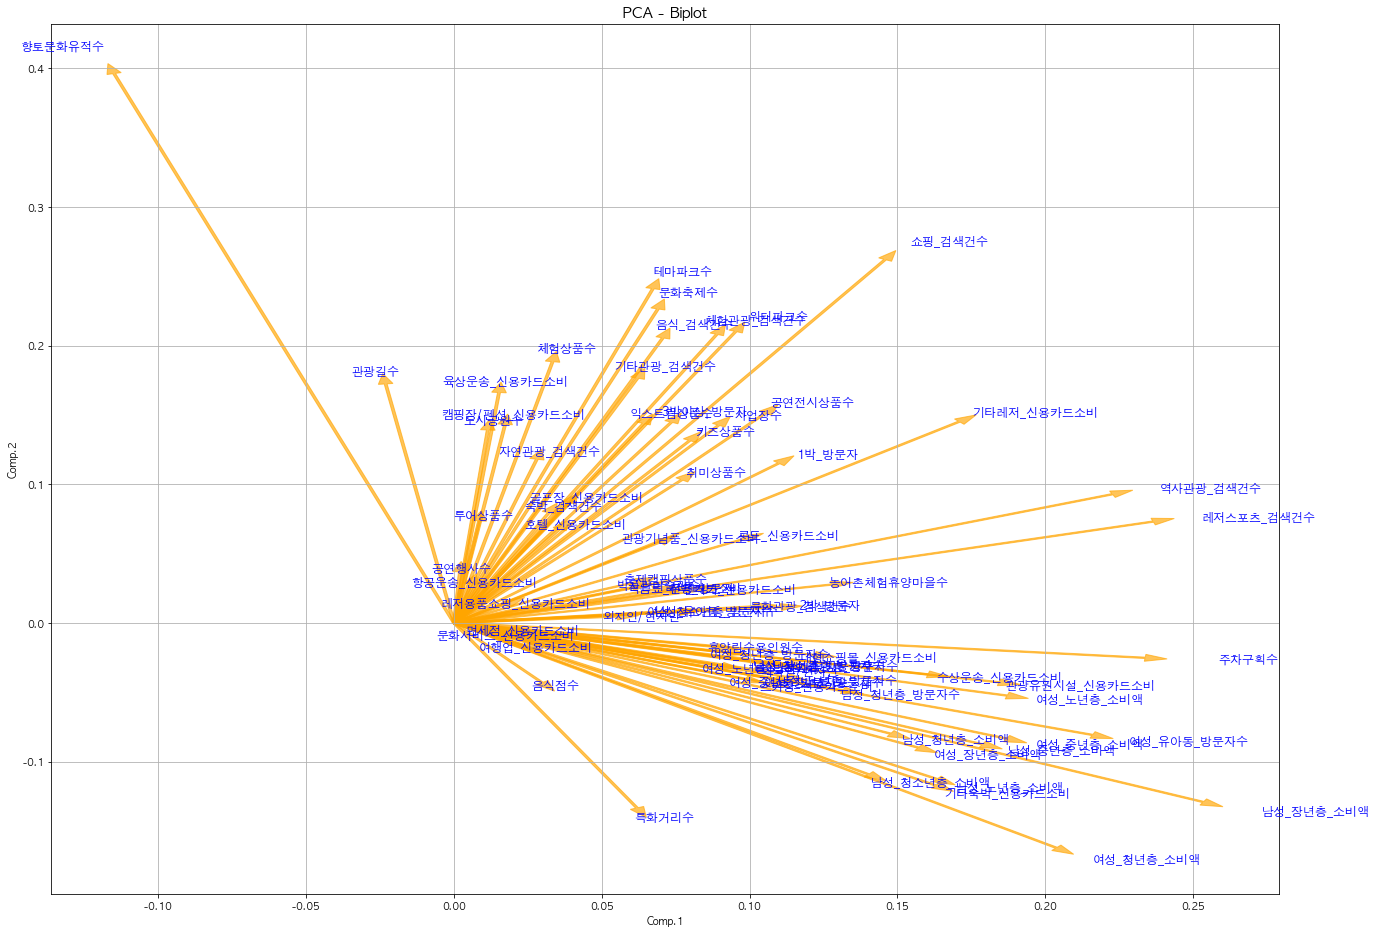

In [449]:
biplot(np.transpose(pca.components_), labels = scaled_data.columns[1:-2].tolist(), index = None)

***
## ML

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [49]:
rf = RandomForestRegressor(random_state = 42)

In [50]:
X = scaled_data.iloc[:, 1:-2]
y = scaled_data['문화관광지수']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2022, shuffle = True)

In [52]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [53]:
pred = rf.predict(X_test)

In [54]:
rmse = np.sqrt(mean_squared_error(y_test, pred))

In [55]:
print(f'RMSE = {rmse}')

RMSE = 0.9506595409019133


In [56]:
fi = rf.feature_importances_

In [57]:
fi_result = pd.DataFrame({'Feature' : X.columns, 'Importance' : fi})

In [58]:
fi_result.sort_values(by = 'Importance', ascending = False).head(15)

,Feature,Importance
55,남성_중년층_방문자수,0.148286
28,무박_방문자,0.141477
18,수상운송_신용카드소비,0.096374
62,여성_청년층_방문자수,0.071007
1,레저스포츠_검색건수,0.070107
65,남성_유아동_방문자수,0.048326
24,호텔_신용카드소비,0.043720
70,여성_노년층_소비액,0.041530
23,콘도_신용카드소비,0.035763
66,여성_유아동_방문자수,0.034202
